**UE 4268 - Examen 2023**

**`Noms: MIMBOE MVOGO et prenoms: Marie Louise`**, `matricule: 18Y457` et `louise.mimboe@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire: PMB`

`Date: 19-06-2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [1]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.03.1
2.2.1


In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

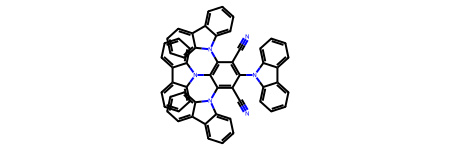

In [9]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
m = Chem.MolFromSmiles(smi) 
m

In [28]:
print(f' the number of heavy atoms (non-hydrogen atoms) in the molecule is {m,GetNumHeavyAtoms()}')

NameError: name 'GetNumHeavyAtoms' is not defined

In [25]:

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    
    print('f our molecular properties are:\n {molwt} ,\t polarisabilite:{tpsa},\t solubilite:{logP},\t nombre de liaisons donneurs:{hbd},\t nombre de liaison accepteur:{hba}

SyntaxError: unterminated string literal (detected at line 7) (3184717005.py, line 7)

In [8]:
df = pd.DataFrame(data=smile, columns=['zinc_Smiles'])
df

NameError: name 'pd' is not defined

In [7]:
molecule = df.iloc[:,1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

NameError: name 'df' is not defined

In [ ]:
descriptors_df1 = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA'])
data = pd.concat([df1, descriptors_df1], axis=1)
data

6

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:

CzIPN_mol=gto.Mole(
    atom='open('MIMBOE_4CzIPN.xyz').read(),
    basis='631g*',
    
    charge=0,
    ecp={}, # Effective core potentials (ECP) which replace core electrons around a nucleus by pseudopotentials. It's useful for heavy elements present in a molecule.
    spin=0,
    unit='Angstrom'
)
CzIPN_mol.build()

SyntaxError: unterminated string literal (detected at line 2) (1136242421.py, line 2)

7-

In [11]:
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

In [12]:
a=I^I
print(a)

II


In [13]:
b=((Z^I)-(I^Z))
print(b)

1.0 * ZI
- 1.0 * IZ


In [14]:
c=(Z^Z)
print(c)

ZZ


In [15]:
d=X^X
print(d)

XX


In [17]:
E=(X^I)+(I^X)
print(E)

1.0 * XI
+ 1.0 * IX


In [18]:
F=(X^Z)-(Z^X)
print(F)

1.0 * XZ
- 1.0 * ZX


In [19]:
H = (-0.46959492273396025*a) -0.12480163590374627*b -0.026903253444563915*c+ 0.004924575935052124*d  -4.6840929608197336e-06*E+- 4.683976972721447e-06*F
print(H)

-0.46959492273396025 * II
- 0.12480163590374627 * ZI
+ 0.12480163590374627 * IZ
- 0.026903253444563915 * ZZ
+ 0.004924575935052124 * XX
- 4.6840929608197336e-06 * XI
- 4.6840929608197336e-06 * IX
- 4.683976972721447e-06 * XZ
+ 4.683976972721447e-06 * ZX


In [20]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

/tmp/ipykernel_72525/1463833043.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)


The exact ground state energy is: -0.692343516358845
